Лабораторная работа 1

Вариант 22
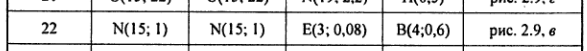

In [482]:
import numpy as np
import pandas as pd
import scipy
import math
from numpy.random import Generator, PCG64
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [483]:
rng = Generator(PCG64(seed=42))

x1 = rng.normal(loc=15, scale=1, size=500)
x2 = rng.normal(loc=15, scale=1, size=500)

x3 = rng.gamma(shape=3, scale=12.5, size=500) # значит, λ = 1 / 0.08 = 12.5
ff.create_distplot(
    [x1, x2, x3],
    ["x1", "x2", "x3"],
    show_hist=False
)


In [484]:
V = rng.binomial(4,0.6, size=500)
ff.create_distplot([V], ["V"], show_hist=True, curve_type="normal")

In [485]:
df = pd.DataFrame({
    "X1": x1, "X2":x2, "X3":x3, "V":V
})
df.head()

,X1,X2,X3,V
0,15.304717,16.363862,32.137816,3
1,13.960016,15.895185,25.568534,4
2,15.750451,14.280520,33.394471,1
3,15.940565,13.497497,48.967426,3
4,13.048965,12.035471,51.275766,2


определение времени безотказной работы системы

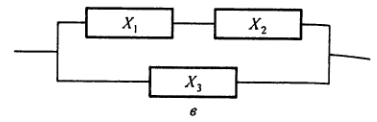

Данная схема является иллюстрацией системы с включенным резервированием, отказ которой произойдет при отказе элементов X1,X3 или X2,X3.
В таком случае вероятность отказа всей системы будет равна:
P(t) = 1-(1-X3)(1-X1*X2)
В таком случае время отказа системы будет = Y = max(X3, min(X1, X2))

In [486]:
df["X1X2"] = df.loc[:,["X1","X2"]].min(axis=1)
df["Y"] = df.loc[:,["X1X2","X3"]].max(axis=1)
df = df.drop("X1X2",axis=1)
df["Z"] = df["Y"].div((1 + 0.1 * df.V), axis="index")
ff.create_distplot([df["Z"], df["Y"]], ["Z", "Y"], show_hist=False, curve_type="kde")

In [487]:
df

,X1,X2,X3,V,Y,Z
0,15.304717,16.363862,32.137816,3,32.137816,24.721397
1,13.960016,15.895185,25.568534,4,25.568534,18.263239
2,15.750451,14.280520,33.394471,1,33.394471,30.358610
3,15.940565,13.497497,48.967426,3,48.967426,37.667251
4,13.048965,12.035471,51.275766,2,51.275766,42.729805
...,...,...,...,...,...,...
495,15.935547,15.352720,38.743114,1,38.743114,35.221012
496,13.168594,15.766823,61.902770,3,61.902770,47.617516
497,14.664393,15.121178,15.410206,2,15.410206,12.841838
498,13.009188,15.130764,47.805447,4,47.805447,34.146748


Статистическая обработка

In [488]:
def calculate_statistics(df):
    stats = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column].dropna()
        stats[column] = {
            'Выборочное среднее': np.mean(data),
            'Выборочная дисперсия': np.var(data, ddof=1),
            'Среднеквадратичное отклонение': np.std(data, ddof=1),
            'Минимальное значение': np.min(data),
            'Максимальное значение': np.max(data),
            'Размах выборки': np.max(data) - np.min(data),
            'Асимметрия': scipy.stats.skew(data),
            'Эксцесс': scipy.stats.kurtosis(data)
        }
    return pd.DataFrame(stats)

# Вычисляем статистики
stats_df = calculate_statistics(df)
stats_df

,X1,X2,X3,V,Y,Z
Выборочное среднее,14.986874,14.955343,36.339866,2.426000,36.974945,29.991858
Выборочная дисперсия,0.921474,1.037090,437.885956,0.986497,405.295914,275.288369
Среднеквадратичное отклонение,0.959934,1.018376,20.925725,0.993226,20.131962,16.591816
Минимальное значение,12.433342,11.351587,1.798976,0.000000,12.590078,9.617399
Максимальное значение,17.913862,18.178854,129.861287,4.000000,129.861287,99.893298
Размах выборки,5.480521,6.827267,128.062311,4.000000,117.271209,90.275899
Асимметрия,0.093409,-0.153254,1.012162,-0.218585,1.193573,1.201776
Эксцесс,-0.051650,0.160208,1.273473,-0.481740,1.570753,1.502386


In [489]:
stats_df.loc[:,'Z']

Выборочное среднее                29.991858
Выборочная дисперсия             275.288369
Среднеквадратичное отклонение     16.591816
Минимальное значение               9.617399
Максимальное значение             99.893298
Размах выборки                    90.275899
Асимметрия                         1.201776
Эксцесс                            1.502386
Name: Z, dtype: float64

In [490]:
math.ceil(stats_df.loc["Максимальное значение","Z"])

100

In [491]:
max_x = math.ceil(stats_df.loc["Максимальное значение","Z"])
min_x = math.floor(stats_df.loc["Минимальное значение","Z"])
r = max_x - min_x
k = 10
h = r / k # шаг

pd.DataFrame({
    "n": [500],
    "Xmax": [max_x],
    "Xmin": [min_x],
    "R": [r],
    "k": [k],
    "h": [h],
})

,n,Xmax,Xmin,R,k,h
0,500,100,9,91,10,9.1


In [492]:
# Разбиение на 10 групп
bins = np.linspace(min_x, max_x, k + 1)  # Границы интервалов
df['interval'] = pd.cut(df['Z'], bins, right=False)  # Группировка

In [493]:
df.loc[:,["Z", "interval"]].sort_values("Z")

,Z,interval
399,9.617399,"[9.0, 18.1)"
335,9.845314,"[9.0, 18.1)"
236,9.886701,"[9.0, 18.1)"
5,9.962295,"[9.0, 18.1)"
151,9.974533,"[9.0, 18.1)"
...,...,...
493,85.028254,"[81.8, 90.9)"
374,86.960983,"[81.8, 90.9)"
171,88.506239,"[81.8, 90.9)"
344,90.913081,"[90.9, 100.0)"


In [494]:
freq_table = df['interval'].value_counts().sort_index()
rel_freq = freq_table / freq_table.sum()  # Относительные частоты
cum_freq = freq_table.cumsum()  # Накопленные частоты
cum_rel_freq = rel_freq.cumsum()  # Накопленные относительные частоты
midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(k)]  # Середины интервалов

In [495]:
# Таблица частот
stat_df_fr = pd.DataFrame({
    'Границы интервала': [f"[{bins[i]:.1f}, {bins[i+1]:.1f})" for i in range(k)],
    'Частота': freq_table.values,
    'Середины интервалов': midpoints,
    'Относительная частота': rel_freq.values,
    'Накопленная частота': cum_freq.values,
    'Накопленная относительная частота': cum_rel_freq.values
})

stat_df_fr

,Границы интервала,Частота,Середины интервалов,Относительная частота,Накопленная частота,Накопленная относительная частота
0,"[9.0, 18.1)",139,13.55,0.278,139,0.278
1,"[18.1, 27.2)",120,22.65,0.240,259,0.518
2,"[27.2, 36.3)",97,31.75,0.194,356,0.712
3,"[36.3, 45.4)",64,40.85,0.128,420,0.840
4,"[45.4, 54.5)",36,49.95,0.072,456,0.912
5,"[54.5, 63.6)",20,59.05,0.040,476,0.952
6,"[63.6, 72.7)",10,68.15,0.020,486,0.972
7,"[72.7, 81.8)",8,77.25,0.016,494,0.988
8,"[81.8, 90.9)",4,86.35,0.008,498,0.996
9,"[90.9, 100.0)",2,95.45,0.004,500,1.000


In [496]:
freq_table = df['interval'].value_counts().sort_index()

In [497]:
# Полигон частот и кумулята
fig = go.Figure()
fig.add_traces([
    go.Scatter(x=midpoints, y=freq_table,  marker=dict(color="blue"), mode='lines+markers', name='Полигон частот', legendgroup = "Полигон частот",),
    go.Bar(x=midpoints, y=freq_table, width=2, marker=dict(color="blue"),opacity=0.3, name='Полигон частот 0', showlegend=False, legendgroup = "Полигон частот")
])
fig.add_trace(go.Scatter(x=midpoints, y=cum_freq, mode='lines+markers', name='Кумулята', line=dict(dash='dash')))
fig.update_layout(title="Полигон частот и Кумулята", xaxis_title="Значение Z", yaxis_title="Частота", template="plotly_white")
fig.show()

In [498]:
# Гистограмма плотностей относительных частот
fig = go.Figure()
fig.add_trace(
    go.Bar(x=midpoints, y=rel_freq, width=h * 0.9, marker=dict(color='blue'), opacity=0.5, name='Относительная частота', legendgroup = "1", showlegend=False)
)
fig.add_trace(
    go.Scatter(x=midpoints, y=rel_freq,  marker=dict(color="blue"), mode='lines+markers', name='Относительная частота', legendgroup = "1")
)
fig.update_layout(title="Гистограмма плотностей относительных частот", xaxis_title="Значение Z", yaxis_title="Плотность", template="plotly_white")
fig.show()

In [499]:
def optimized_gamma_parameters(m, sig):
    """
    Оптимизированные параметры гамма-распределения
    с коррекцией на асимптотическое смещение
    """
    alf = ((m**2) / (sig**2)) 
    bet = ((sig**2) / m) 
    
    return alf, bet

In [500]:
m = stats_df.loc["Выборочное среднее",'Z']
sig = stats_df.loc["Среднеквадратичное отклонение",'Z']
a = m - sig * math.sqrt(3)
b = m + sig * math.sqrt(3)
alf, bet = optimized_gamma_parameters(m, sig)
sigma_ln = math.sqrt(math.log(1 + (sig**2 / m**2)))
mu_ln = math.log(m) - 0.5 * sigma_ln**2

def weibull_params_correct(m, sig):
    """Правильная оценка параметров Вейбулла методом моментов"""
    
    def equation(k):
        gamma1 = scipy.special.gamma(1 + 1/k)
        gamma2 = scipy.special.gamma(1 + 2/k)
        return (sig/m)**2 - (gamma2/gamma1**2 - 1)
    
    # Используем более надежный численный метод
    shape_wbl = scipy.optimize.fsolve(equation, 2.0)[0]  # начальное приближение k=2
    scale_wbl = m / scipy.special.gamma(1 + 1/shape_wbl)
    
    return shape_wbl, scale_wbl
shape_wbl, scale_wbl = weibull_params_correct(m, sig)

In [501]:
print("параметры распределения вейбулла")
print(f"scale_wbl: {scale_wbl}; shape: {shape_wbl}")

параметры распределения вейбулла
scale_wbl: 33.78566115608024; shape: 1.8781057019007485


In [502]:
print("параметры равномерного распределения")
print(f"a: {a}; b: {b}")

параметры равномерного распределения
a: 1.25398959852685; b: 58.72972728494419


In [503]:
print("параметры нормального распределения")
print(f"m: {m}; sig: {sig}")

параметры нормального распределения
m: 29.99185844173552; sig: 16.591816312562685


In [504]:
print("параметры гамма-распределения")
print(f"alfa: {alf}; beta: {bet}")

параметры гамма-распределения
alfa: 3.267524805089286; beta: 9.178769934668018


In [505]:
print("параметры логнормального распределения")
print(f"mu_ln: {mu_ln}; sigma_ln: {sigma_ln}")

параметры логнормального распределения
mu_ln: 3.2674253444142276; sigma_ln: 0.5167216177804003


In [506]:
raspred_df = pd.DataFrame({
    "равномерное": rng.uniform(low=a, high=b, size=500),
    "нормальное": rng.normal(loc=m, scale=sig, size=500),
    "гамма-распределение": rng.gamma(shape=alf, scale=bet, size=500),
    "логнормальное": rng.lognormal(mean=mu_ln, sigma=sigma_ln, size=500),
    "вейбулла": rng.weibull(shape_wbl, 500) * scale_wbl
})

In [507]:
ff.create_distplot(
    [raspred_df["равномерное"], raspred_df["нормальное"], raspred_df["гамма-распределение"], raspred_df["логнормальное"], raspred_df["вейбулла"]],
    ["равномерное", "нормальное", "гамма-распределение", "логнормальное", "вейбулла"],
    show_hist=False
)

In [508]:
raspred_df["interval_равномерное"] = pd.cut(raspred_df["равномерное"], bins, right=False)
raspred_df["interval_нормальное"] = pd.cut(raspred_df["нормальное"], bins, right=False)
raspred_df["interval_гамма-распределение"] = pd.cut(raspred_df["гамма-распределение"], bins, right=False)
raspred_df["interval_логнормальное"] = pd.cut(raspred_df["логнормальное"], bins, right=False)
raspred_df["interval_вейбулла"] = pd.cut(raspred_df["вейбулла"], bins, right = False)

raspred_df_uniform_freq =  raspred_df["interval_равномерное"].value_counts().sort_index()
raspred_df_normal_freq =  raspred_df["interval_нормальное"].value_counts().sort_index()
raspred_df_gamma_freq =  raspred_df["interval_гамма-распределение"].value_counts().sort_index()
raspred_df_log_freq = raspred_df["interval_логнормальное"].value_counts().sort_index()
raspred_df_weib_freq = raspred_df["interval_вейбулла"].value_counts().sort_index()

raspred_df_uniform_freq_dense =  raspred_df_uniform_freq / raspred_df_uniform_freq.sum() / h
raspred_df_normal_freq_dense =  raspred_df_normal_freq / raspred_df_normal_freq.sum() / h
raspred_df_gamma_freq_dense =  raspred_df_gamma_freq / raspred_df_gamma_freq.sum() / h
rapsred_df_log_freq_dense = raspred_df_log_freq / raspred_df_log_freq.sum() / h
rapsred_df_log_weib_dense = raspred_df_weib_freq / raspred_df_weib_freq.sum() / h

raspred_df_stats = stat_df_fr[['Середины интервалов', 'Относительная частота']]

raspred_df_stats['Плотность относительной частоты'] = raspred_df_stats['Относительная частота'] / h
raspred_df_stats['Плотность равномерного распределения'] = raspred_df_uniform_freq_dense.values
raspred_df_stats['Плотность нормального распределения'] = raspred_df_normal_freq_dense.values
raspred_df_stats['Плотность гамма-распределения'] = raspred_df_gamma_freq_dense.values
raspred_df_stats['Плотность логнормального распределения'] = rapsred_df_log_freq_dense.values
raspred_df_stats['Плотность распределения вейбулла'] = rapsred_df_log_weib_dense.values
raspred_df_stats

,Середины интервалов,Относительная частота,Плотность относительной частоты,Плотность равномерного распределения,Плотность нормального распределения,Плотность гамма-распределения,Плотность логнормального распределения,Плотность распределения вейбулла
0,13.55,0.278,0.030549,0.021978,0.015594,0.026675,0.025254,0.023565
1,22.65,0.240,0.026374,0.016926,0.024610,0.027815,0.032762,0.028134
2,31.75,0.194,0.021319,0.019957,0.025097,0.024623,0.025027,0.021641
3,40.85,0.128,0.014066,0.022231,0.022173,0.013907,0.012513,0.014428
4,49.95,0.072,0.007912,0.019704,0.014620,0.007068,0.006370,0.011783
5,59.05,0.040,0.004396,0.009094,0.004873,0.005472,0.003640,0.006011
6,68.15,0.020,0.002198,0.000000,0.001949,0.001596,0.002275,0.001683
7,77.25,0.016,0.001758,0.000000,0.000975,0.001596,0.001593,0.001683
8,86.35,0.008,0.000879,0.000000,0.000000,0.001140,0.000228,0.000240
9,95.45,0.004,0.000440,0.000000,0.000000,0.000000,0.000228,0.000721


In [509]:
# Гистограмма плотностей относительных частот разных распределений
fig = go.Figure()
fig.add_trace(
    go.Bar(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность относительной частоты'],
           opacity=0.5, name='Относительная частота',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность равномерного распределения'],
           opacity=0.9, name='Равномерное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность нормального распределения'],
           opacity=0.9, name='Нормальное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность гамма-распределения'],
           opacity=0.9, name='Гамма-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность логнормального распределения'],
           opacity=0.9, name='Логнормальное-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_stats['Плотность распределения вейбулла'],
           opacity=0.9, name='Вейбулла-распределение',
          )
)
fig.update_layout(
    title="Гистограмма плотностей относительных частот разных распределений",
    xaxis_title="Значение Z",
    yaxis_title="Плотность",
    template="plotly_white"
)
fig.show()

In [510]:
# Гистограмма плотностей относительных частот разных распределений
fig = go.Figure()
fig.add_trace(
    go.Bar(x=raspred_df_stats['Середины интервалов'],
           y=freq_table,
           opacity=0.5, name='Относительная частота',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_uniform_freq,
           opacity=0.9, name='Равномерное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_normal_freq,
           opacity=0.9, name='Нормальное распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_gamma_freq,
           opacity=0.9, name='Гамма-распределение',
          )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_log_freq,
           opacity=0.9, name='Логнормальное-распределение',
        )
)
fig.add_trace(
    go.Scatter(x=raspred_df_stats['Середины интервалов'],
           y=raspred_df_weib_freq,
           opacity=0.9, name='Вейбулла-распределение',
        )
)
fig.update_layout(
    title="Гистограмма плотностей относительных частот разных распределений",
    xaxis_title="Значение Z",
    yaxis_title="Плотность",
    template="plotly_white"
)
fig.show()

Подбор распределения на основе χ²

In [511]:
def merge_intervals(arr1: np.ndarray, arr2: np.ndarray, threshold: int = 5):
    """
    Объединяет смежные интервалы (пары элементов из arr1 и arr2)
    на основе условия.

    Args:
        arr1: Первый numpy массив.
        arr2: Второй numpy массив.
        threshold: Пороговое значение для условия объединения. По умолчанию 5.

    Returns:
        Кортеж, содержащий два numpy массива (new_arr1, new_arr2)
        с объединенными интервалами.

    Raises:
        ValueError: Если входные массивы имеют разную длину.
    """
    
    if len(arr1) != len(arr2):
        raise ValueError("Входные массивы должны иметь одинаковую длину.")
    if len(arr1) == 0:
        return np.array([]), np.array([])

    new_arr1 = []
    new_arr2 = []

    tmp_elem1 = 0
    tmp_elem2 = 0

    for elem1, elem2 in zip(arr1.tolist(),arr2.tolist()):
        should_merge = (elem1 <= threshold) or (elem2 <= threshold)

        if should_merge:
            tmp_elem1 += elem1
            tmp_elem2 += elem2
            if tmp_elem1 >= threshold and tmp_elem2 >= threshold:
                new_arr1.append(tmp_elem1)
                new_arr2.append(tmp_elem2)
                tmp_elem1 = 0
                tmp_elem2 = 0
        else:
            new_arr1.append(elem1 + tmp_elem1)
            new_arr2.append(elem2 + tmp_elem2)
            tmp_elem1 = 0
            tmp_elem2 = 0

    if tmp_elem1 != 0 or tmp_elem2 != 0:
        new_arr1[-1] += tmp_elem1
        new_arr2[-1] += tmp_elem2

    return np.array(new_arr1, dtype=arr1.dtype), np.array(new_arr2, dtype=arr2.dtype)

In [512]:
print(f"вейбулла распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_weib_freq.values, freq_table.values), ddof=2, sum_check=False)}")

вейбулла распределение: Power_divergenceResult(statistic=np.float64(20.410981406332958), pvalue=np.float64(0.001046124269567187))


In [513]:
print(f"равномерное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_uniform_freq.values, freq_table.values), sum_check=False, ddof=2)}")

равномерное распределение: Power_divergenceResult(statistic=np.float64(105.65632238351775), pvalue=np.float64(9.439794312930613e-23))


In [514]:
print(f"нормальное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_normal_freq.values, freq_table.values), ddof=2, sum_check = False)}")


нормальное распределение: Power_divergenceResult(statistic=np.float64(77.23771825323246), pvalue=np.float64(6.697990839697498e-16))


In [515]:
print(f"гамма распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_gamma_freq.values, freq_table.values), ddof=2, sum_check = False)}")

гамма распределение: Power_divergenceResult(statistic=np.float64(7.589506513346024), pvalue=np.float64(0.26974516921212727))


In [516]:
print(f"логнормальное распределение: {scipy.stats.chisquare(*merge_intervals(raspred_df_log_freq.values, freq_table.values), ddof=2, sum_check = False)}")

логнормальное распределение: Power_divergenceResult(statistic=np.float64(17.81167287451335), pvalue=np.float64(0.0031919313343843243))


Основываясь на показателе χ²выч и значении pvalue можно предположить, что гипотеза о гамма распределении является верной.
проведём проверку критическим значением χ² с уровнем значимости 0.05

In [517]:
k1 = len(merge_intervals(raspred_df_gamma_freq.values, freq_table.values)[0])
ddof = 2
f_degree = k1 - ddof - 1
f_degree

6

По таблице χ²крит(6,0.05) = 12.6
Вычисленный: 7.589506513346024
Следовательно статистические данные имеют гамма-распределение с параметрами: 
alfa: 3.267524805089286; beta: 9.178769934668018


Определение характеристик надёжности системы


In [518]:
times = np.arange(0, 55, 1)
dist = scipy.stats.Uniform(a=a, b=b)
Pt = 1 - dist.cdf(times)

In [519]:
px.line(x=times, y=Pt,
        title='Вероятность безотказной работы', markers=True,
        labels={"x": "t", "y": "P(t)"}, range_y=[0,1.1], range_x=[-0.1,55.1])

In [520]:
print(f"Выборочное среднее: {m}")

Выборочное среднее: 29.99185844173552


In [521]:
1 - dist.cdf(m)

np.float64(0.5)

Вероятность достижения среднего времени наработки на отказ: 50%